# Jensen-Shannon Divergence (JSD)

The Jensen-Shannon Divergence (JSD) is a method to measure the similarity between two probability distributions. It is often preferred over the Kullback-Leibler (KL) Divergence because it is symmetric and always yields a finite value, making it more robust in various applications.

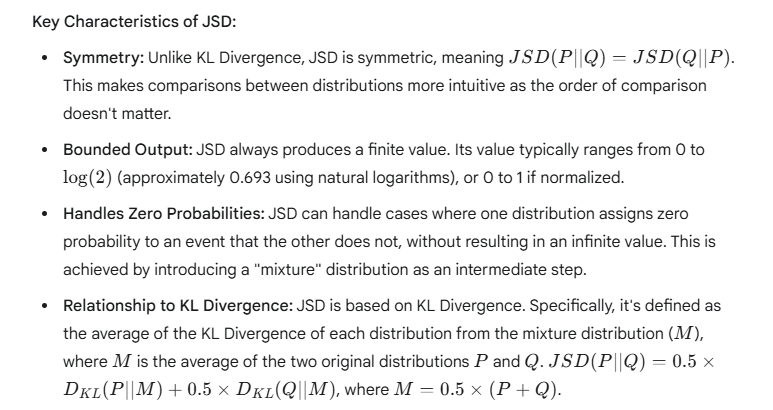

Example: Comparing Customer Feedback for Two Products

Imagine a company receives customer feedback for two different products (Product A and Product B), categorized into three sentiment levels: "Negative," "Neutral," and "Positive." We want to quantify how similar or dissimilar the sentiment distributions are for these two products.

Product A Feedback Distribution (P):

Negative: 10% (0.1)
Neutral: 20% (0.2)
Positive: 70% (0.7)
Product B Feedback Distribution (Q):

Negative: 30% (0.3)
Neutral: 40% (0.4)
Positive: 30% (0.3)

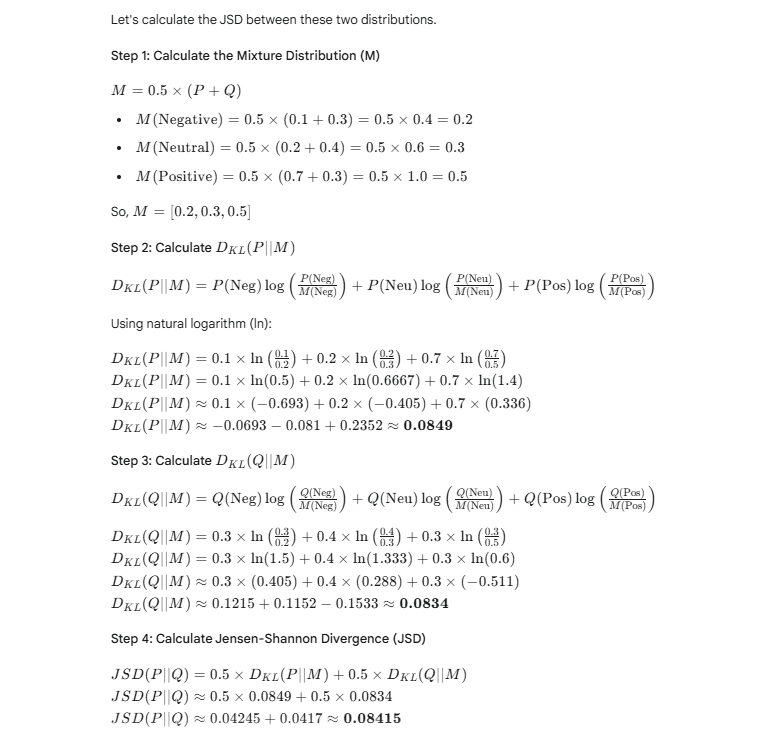

Interpretation:

A JSD value of approximately 0.08415 indicates a moderate level of dissimilarity between the customer feedback sentiment distributions for Product A and Product B. Since JSD ranges from 0 (identical) to ln(2)≈0.693 (maximally different for natural log), this value suggests that while the distributions are not identical, they are not completely divergent either.

Product A has a strong positive sentiment, while Product B is more balanced but leans slightly more towards neutral/negative compared to A. The JSD quantifies this overall difference in their sentiment profiles with a single, interpretable, and symmetric number.

# Notebook Structure

1. Import necessary libraries
2. Define the utility function - jensen_shannon_divergence
3. Calculate jensen_shannon_divergence  between different distribution

# Scenario

Usecase Example: Comparing the Distribution of "User Engagement Levels" in an A/B Test

Let's assume we're running an A/B test on a new notification system. We want to see if it changes the overall engagement level of users, categorized into:

* Low Engagement
* Medium Engagement
* High Engagement

We'll use JSD to compare the probability distributions of these engagement levels between the Control (Group A - no new notifications) and Treatment (Group B - new notifications) groups.

# 1. Import necessary libraries

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import entropy # For KL Divergence calculation
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Define the utility function - jensen_shannon_divergence

In [23]:
def jensen_shannon_divergence(p_dist, q_dist):
    """
    Calculates the Jensen-Shannon Divergence (JSD) between two probability distributions P and Q.

    JSD(P || Q) = 0.5 * D_KL(P || M) + 0.5 * D_KL(Q || M)
    where M = 0.5 * (P + Q) is the mixture distribution.

    Args:
        p_dist (array-like): The first probability distribution P. Must sum to 1.
        q_dist (array-like): The second probability distribution Q. Must sum to 1.

    Returns:
        float: The Jensen-Shannon Divergence.
    """
    p_dist = np.asarray(p_dist, dtype=float)
    q_dist = np.asarray(q_dist, dtype=float)

    # Ensure probabilities sum to 1
    p_dist /= p_dist.sum()
    q_dist /= q_dist.sum()

    # Calculate the mixture distribution M
    m_dist = 0.5 * (p_dist + q_dist)

    # Calculate KL Divergence for P || M and Q || M
    # scipy.stats.entropy automatically handles log(0) cases by returning 0 for that term,
    # or inf if the reference has prob > 0 where the other has 0.
    # Here, m_dist will never be zero if P or Q are non-zero, preventing inf.
    kl_pm = entropy(p_dist, m_dist)
    kl_qm = entropy(q_dist, m_dist)

    jsd = 0.5 * kl_pm + 0.5 * kl_qm
    return jsd

# 3. Calculate jensen_shannon_divergence  between different distribution

### A. Simulate A/B Test Data for "User Engagement Levels

In [24]:
# --- Simulate A/B Test Data for "User Engagement Levels" ---

# Define engagement categories
engagement_levels = ["Low", "Medium", "High"]

# Simulate counts for Control Group (P - reference)
# Control might have a higher proportion of low engagement
control_counts = np.array([4500, 3500, 2000]) # Example counts for 10000 users
control_total = control_counts.sum()
p_dist = control_counts / control_total # Convert to probability distribution

# Simulate counts for Treatment Group (Q - comparison)
# New notification system might boost medium/high engagement
treatment_counts = np.array([3000, 4000, 3000]) # Example counts for 10000 users
treatment_total = treatment_counts.sum()
q_dist = treatment_counts / treatment_total # Convert to probability distribution

print("--- A/B Test for 'User Engagement Levels' ---")
print(f"Engagement Categories: {engagement_levels}\n")

print(f"Control Group (P) Counts: {control_counts}")
print(f"Control Group (P) Distribution: {p_dist}\n")

print(f"Treatment Group (Q) Counts: {treatment_counts}")
print(f"Treatment Group (Q) Distribution: {q_dist}\n")

--- A/B Test for 'User Engagement Levels' ---
Engagement Categories: ['Low', 'Medium', 'High']

Control Group (P) Counts: [4500 3500 2000]
Control Group (P) Distribution: [0.45 0.35 0.2 ]

Treatment Group (Q) Counts: [3000 4000 3000]
Treatment Group (Q) Distribution: [0.3 0.4 0.3]



### B. Calculate and Print the jensen_shannon_divergence  

In [25]:
# --- Calculate Jensen-Shannon Divergence ---

jsd_value = jensen_shannon_divergence(p_dist, q_dist)

print(f"Jensen-Shannon Divergence (JSD): {jsd_value:.5f}")

# You can also use the square root of JSD, which is a true metric (JSD distance)
jsd_distance = np.sqrt(jsd_value)
print(f"Jensen-Shannon Distance (sqrt(JSD)): {jsd_distance:.5f}")

print("\n--- Interpretation ---")
print("A low JSD value (closer to 0) means the two distributions are very similar.")
print("A high JSD value (closer to log(2) if using natural log, or 1 if normalized, but typically max is log(2) or less) indicates greater dissimilarity.")
print(f"In this case, a JSD of {jsd_value:.5f} (and JSD distance of {jsd_distance:.5f}) indicates a noticeable difference between the engagement level distributions of the Control and Treatment groups.")
print("The new notification system appears to have shifted users from 'Low' engagement towards 'Medium' and 'High' engagement levels.")
print("JSD is symmetric, so JSD(P || Q) = JSD(Q || P), making its interpretation more straightforward than KL Divergence for general distributional comparisons.")

Jensen-Shannon Divergence (JSD): 0.01342
Jensen-Shannon Distance (sqrt(JSD)): 0.11584

--- Interpretation ---
A low JSD value (closer to 0) means the two distributions are very similar.
A high JSD value (closer to log(2) if using natural log, or 1 if normalized, but typically max is log(2) or less) indicates greater dissimilarity.
In this case, a JSD of 0.01342 (and JSD distance of 0.11584) indicates a noticeable difference between the engagement level distributions of the Control and Treatment groups.
The new notification system appears to have shifted users from 'Low' engagement towards 'Medium' and 'High' engagement levels.
JSD is symmetric, so JSD(P || Q) = JSD(Q || P), making its interpretation more straightforward than KL Divergence for general distributional comparisons.


# Interpretation

Here's what these numbers tell you:

* Non-Zero Difference:

The JSD value of 0.01342 is greater than 0. This immediately indicates that the probability distribution of user engagement levels in your Treatment group is not identical to that in your Control group. There has been a change or shift in how users engage between the two designs.

* Magnitude of Difference:

A JSD value of 0.01342 is relatively small. Remember that JSD has an upper bound (for natural logarithm, it's ln(2)≈0.693). A value this low suggests that while there is a detectable difference, the overall shapes of the engagement distributions are still quite similar. The new feature or design caused a subtle, rather than a dramatic, shift in user engagement patterns.

* Jensen-Shannon Distance:

The Jensen-Shannon Distance (the square root of JSD), which is 0.11584, is a true metric. This value also confirms the relatively small difference. It gives you a sense of "distance" between the two distributions on a scale that behaves more intuitively than the raw divergence. A distance of 0 means identical distributions, and a distance closer to 1 would indicate very different distributions (though the theoretical maximum for this scaled version can be higher than 1 if not explicitly normalized to 0-1 range).

In Summary for your A/B Test:

* These results suggest that the new notification system (Treatment group) did indeed lead to a subtle but quantifiable change in the distribution of user engagement levels compared to the Control group. The magnitude of this change, as indicated by the low JSD value, is not immense, but it is present.
* To fully understand the nature of this change (e.g., were more users pushed from "Low" to "Medium" engagement?), you would still refer back to the bar chart visualizing the two distributions, which shows the specific shifts in proportions across each engagement level category. The JSD simply provides a single, robust number summarizing the overall dissimilarity.

### C. Visualization of the distribution

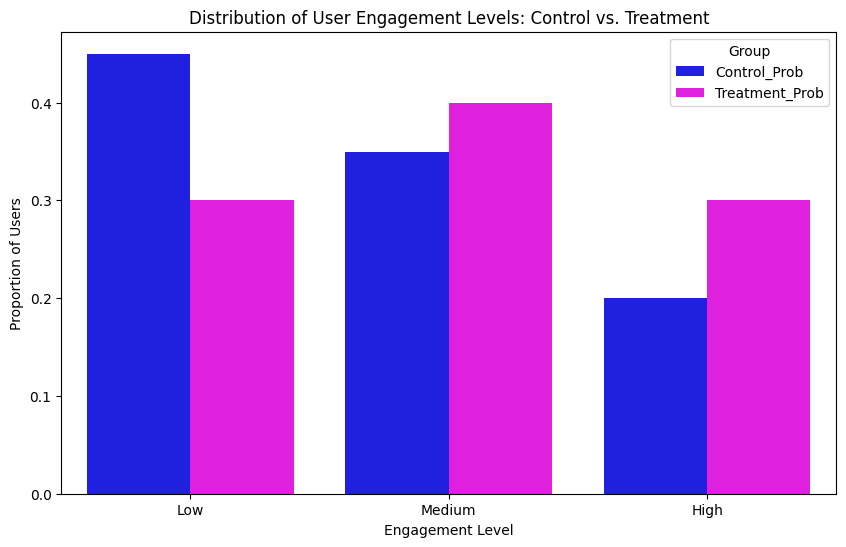

In [28]:
# --- Visualization of Distributions ---
df_dist = pd.DataFrame({
    'Category': engagement_levels,
    'Control_Prob': p_dist,
    'Treatment_Prob': q_dist
})

df_dist_melted = df_dist.melt(id_vars='Category', var_name='Group', value_name='Probability')

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Probability', hue='Group', data=df_dist_melted, palette={'Control_Prob': 'blue', 'Treatment_Prob': 'magenta'})
plt.title('Distribution of User Engagement Levels: Control vs. Treatment')
plt.xlabel('Engagement Level')
plt.ylabel('Proportion of Users')
plt.show()

### Detailed Interpretation

Here's a detailed interpretation:

Purpose of the Graph: The graph aims to show how a new feature or design (Treatment Group) impacts the distribution of user engagement compared to the existing design (Control Group). It's a key visual for an A/B test.

Categories of Engagement: The x-axis divides user engagement into three distinct levels:

* "Low"
* "Medium"
* "High"

Proportion of Users (Y-axis): The y-axis represents the proportion of users falling into each engagement level. This allows for a direct comparison of the distribution shapes.

Comparison Between Control and Treatment Groups:

* "Low" Engagement: The Control Group (blue bar) has a significantly higher proportion of users (around 0.45 or 45%) with low engagement compared to the Treatment Group (magenta bar), which is around 0.30 or 30%.
* "Medium" Engagement: The Treatment Group (magenta bar) shows a higher proportion of users (around 0.40 or 40%) with medium engagement, compared to the Control Group (blue bar) (around 0.35 or 35%).
* "High" Engagement: The Treatment Group (magenta bar) has a noticeably higher proportion of users (around 0.30 or 30%) with high engagement, compared to the Control Group (blue bar) which is at approximately 0.20 or 20%.

Overall Trend/Impact of Treatment:

* The graph clearly demonstrates a shift in the distribution of user engagement levels.
* The Treatment Group (new design) appears to be more effective at:
    * Reducing the proportion of users with low engagement.
    * Increasing the proportion of users with medium and high engagement.
* This suggests that the new notification system (the "Treatment") might be successfully boosting user engagement.

# Completed